# Assignment Book Recommender System

### 1. Data Preparation

### Importing Libraries

In [161]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 1.1 - Read datasets

In [162]:
books = pd.read_csv("Books.csv")
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv")

In [163]:
cutted_length_books = len(books) // 5
books = books[:cutted_length_books]

cutted_length_users = len(users) // 5
users = users[:cutted_length_users]

cutted_length_ratings = len(ratings) // 5
ratings = ratings[:cutted_length_ratings]

### 1.2 - List the datasets

In [164]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
54267,1567920950,Reading in Bed: Personal Essays on the Glories...,Steven Gilbar,1999,David R. Godine Publisher,http://images.amazon.com/images/P/1567920950.0...,http://images.amazon.com/images/P/1567920950.0...,http://images.amazon.com/images/P/1567920950.0...
54268,1585673773,To Have And To Hold: An Intimate History Of Co...,Philipp Blom,2003,Overlook Press,http://images.amazon.com/images/P/1585673773.0...,http://images.amazon.com/images/P/1585673773.0...,http://images.amazon.com/images/P/1585673773.0...
54269,0312260628,The Bedford Handbook: Updated With Mla's and A...,Diana Hacker,2000,Bedford Books,http://images.amazon.com/images/P/0312260628.0...,http://images.amazon.com/images/P/0312260628.0...,http://images.amazon.com/images/P/0312260628.0...
54270,0972002626,Nobody Gets the Girl: A Comic Book Novel,James Maxey,2003,Phobos Books,http://images.amazon.com/images/P/0972002626.0...,http://images.amazon.com/images/P/0972002626.0...,http://images.amazon.com/images/P/0972002626.0...


In [165]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
55766,55767,"st. louis, missouri, usa",37.0
55767,55768,"longview, washington, usa",NaN
55768,55769,"griffin, georgia, usa",NaN
55769,55770,"little rock, arkansas, usa",22.0


In [166]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
229951,53163,000647304,0
229952,53163,0330307231,0
229953,53163,0670041319,8
229954,53163,0701173734,8


### 1.3 Checking the Shape of datasets

In [167]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(54272, 8)
(229956, 3)
(55771, 3)


### 1.4 Checking the null values in the datasets

In [168]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [169]:
users.isnull().sum()

User-ID         0
Location        0
Age         22214
dtype: int64

In [170]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### 1.5 Checking duplicated values in the datasets

In [171]:
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


### 1.6 Merge datasets

In [172]:
ratings_with_book_titles = ratings.merge(books,on='ISBN')
#ratings_with_book_titles.head()

In [173]:
ratings_with_book_titles.drop(columns=["ISBN","Image-URL-S","Image-URL-M"],axis=1,inplace=True)

In [174]:
complete_df = ratings_with_book_titles.merge(users.drop("Age", axis=1), on="User-ID")
#complete_df.head()

### 1.7 Splits location strings by commas

In [175]:
complete_df['Location'] = complete_df['Location'].str.split(',').str[-1].str.strip()

In [176]:
complete_df.head()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
0,2313,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa
1,2313,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,usa
2,2313,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,usa
3,2313,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,usa
4,2313,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,http://images.amazon.com/images/P/0385482388.0...,usa


In [177]:
# Calculate mean rating of all books
complete_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head()

Book-Title
The Loom of God: Mathematical Tapestries at the Edge of Time                     10.0
Guinea Pigs                                                                      10.0
El Senor De Los Anillos/the Lord of the Rings                                    10.0
The Magician's Nephew (rpkg) (Narnia)                                            10.0
TROUBLE AT CAMP TREEHOUSE (NANCY DREW NOTEBOOK 7) : TROUBLE AT CAMP TREEHOUSE    10.0
Name: Book-Rating, dtype: float64

In [178]:
complete_df.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head()

Book-Title
Wild Animus                                        464
The Lovely Bones: A Novel                          257
The Da Vinci Code                                  170
A Painted House                                    170
Divine Secrets of the Ya-Ya Sisterhood: A Novel    166
Name: Book-Rating, dtype: int64

In [179]:
complete_df.groupby('Book-Title').count().info

<bound method DataFrame.info of                                                     User-ID  Book-Rating  \
Book-Title                                                                 
 A Light in the Storm: The Civil War Diary of A...        2            2   
 Beyond IBM: Leadership Marketing and Finance f...        1            1   
 Earth Prayers From around the World: 365 Praye...        1            1   
 Final Fantasy Anthology: Official Strategy Gui...        3            3   
 It Takes Two                                             2            2   
...                                                     ...          ...   
Â¿QuiÃ©n se ha llevado mi queso?                          1            1   
Â¿QuÃ© me quieres, amor?                                  2            2   
Ã?Â?ber die Freiheit.                                     1            1   
Ã?Â?bermorgen.                                            1            1   
Ã?Â?thique en toc                                       

In [180]:
# creating dataframe with 'rating' count values 
avg_ratings = pd.DataFrame(complete_df.groupby('Book-Title')['Book-Rating'].mean())  

#add another column called "num of ratings" that count the total rating
avg_ratings['num of ratings'] = pd.DataFrame(complete_df.groupby('Book-Title')['Book-Rating'].count()) 
  
avg_ratings.sort_values('num of ratings', ascending=False)

,Book-Rating,num of ratings
Book-Title,,
Wild Animus,1.109914,464
The Lovely Bones: A Novel,4.614786,257
The Da Vinci Code,4.641176,170
A Painted House,3.311765,170
Divine Secrets of the Ya-Ya Sisterhood: A Novel,3.530120,166
...,...,...
"Encyclopedia of Things That Never Were: Creatures, Places, and People",0.000000,1
Quaker Witness (An Elizabeth Elliot Mystery),6.000000,1
Encyclopedia of Xanth (A Crossroads Adventure in the World of Piers Anthony's Xanth),0.000000,1


## Create histogram

<AxesSubplot:>

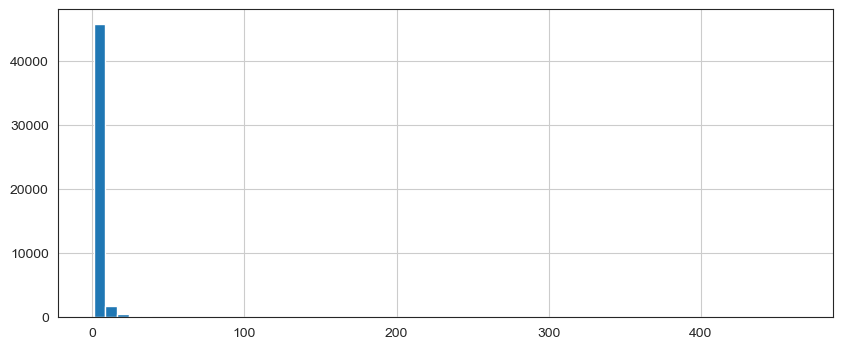

In [181]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 
 
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
avg_ratings['num of ratings'].hist(bins = 60) 

<AxesSubplot:>

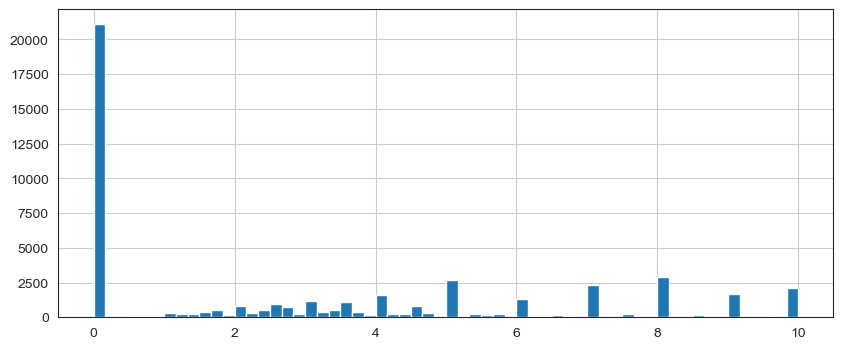

In [182]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
avg_ratings['Book-Rating'].hist(bins = 60) 

## Collaborative Filtering Based Recommender System

In [186]:
# Find the user who have more than 200 ratings
active_user = complete_df.groupby('User-ID')['Book-Rating'].count() > 50

active_user_id = active_user[active_user].index

In [187]:
# Filter ratings from active users
active_user_ratings = complete_df[complete_df['User-ID'].isin(active_user_id)]
active_user_ratings

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
36,6543,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa
37,6543,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,usa
38,6543,0,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,usa
39,6543,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,usa
40,6543,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312966970.0...,usa
...,...,...,...,...,...,...,...,...
127358,31050,0,Dangerous,Nora Roberts,2002,Silhouette,http://images.amazon.com/images/P/0373218540.0...,usa
127359,31050,5,Riley in the Morning,Sandra Brown,2001,Bantam Books,http://images.amazon.com/images/P/0553104144.0...,usa
127360,31050,10,The Wolf and the Dove,Kathleen E. Woodiwiss,1974,Avon,http://images.amazon.com/images/P/0380007789.0...,usa
127361,31050,10,The Kadin,Bertrice Small,1978,Avon,http://images.amazon.com/images/P/0380016990.0...,usa


In [188]:
# Filter the book that have more than 50 ratings
filtered_books = active_user_ratings.groupby('Book-Title').count()['Book-Rating'] > 15

popular_books = filtered_books[filtered_books].index

In [189]:
final_ratings =  active_user_ratings[active_user_ratings['Book-Title'].isin(popular_books)]

final_ratings

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
37,6543,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,usa
38,6543,0,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,usa
39,6543,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,usa
40,6543,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312966970.0...,usa
42,6543,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,http://images.amazon.com/images/P/0446605484.0...,usa
...,...,...,...,...,...,...,...,...
127314,31050,0,Kiss the Girls,James Patterson,1995,Warner Books,http://images.amazon.com/images/P/0446601241.0...,usa
127315,31050,8,We'll Meet Again,Mary Higgins Clark,1999,Simon &amp; Schuster,http://images.amazon.com/images/P/0684835975.0...,usa
127325,31050,0,Suzanne's Diary for Nicholas,James Patterson,2003,Warner Books,http://images.amazon.com/images/P/0446611085.0...,usa
127340,31050,9,The Switch,Sandra Brown,2000,Warner Books,http://images.amazon.com/images/P/0446527033.0...,usa


In [190]:
final_ratings.drop_duplicates()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
37,6543,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,usa
38,6543,0,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,usa
39,6543,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,usa
40,6543,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312966970.0...,usa
42,6543,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,http://images.amazon.com/images/P/0446605484.0...,usa
...,...,...,...,...,...,...,...,...
127314,31050,0,Kiss the Girls,James Patterson,1995,Warner Books,http://images.amazon.com/images/P/0446601241.0...,usa
127315,31050,8,We'll Meet Again,Mary Higgins Clark,1999,Simon &amp; Schuster,http://images.amazon.com/images/P/0684835975.0...,usa
127325,31050,0,Suzanne's Diary for Nicholas,James Patterson,2003,Warner Books,http://images.amazon.com/images/P/0446611085.0...,usa
127340,31050,9,The Switch,Sandra Brown,2000,Warner Books,http://images.amazon.com/images/P/0446527033.0...,usa


In [191]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID', values='Book-Rating')
pt

User-ID,243,254,507,638,741,882,929,1211,1424,1435,...,51742,51883,52002,52199,52203,52350,52584,52614,52853,52917
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2nd Chance,0.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Women Who Run with the Wolves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wuthering Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [192]:
pt.fillna(0,inplace=True)
pt

User-ID,243,254,507,638,741,882,929,1211,1424,1435,...,51742,51883,52002,52199,52203,52350,52584,52614,52853,52917
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Women Who Run with the Wolves,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
from sklearn.metrics.pairwise import cosine_similarity 

In [194]:
similarity_score = cosine_similarity(pt)

similarity_score

array([[1.        , 0.1432532 , 0.03774998, ..., 0.0368589 , 0.04844423,
        0.16874145],
       [0.1432532 , 1.        , 0.2083465 , ..., 0.17427674, 0.11244502,
        0.0603896 ],
       [0.03774998, 0.2083465 , 1.        , ..., 0.17885812, 0.10074688,
        0.05410701],
       ...,
       [0.0368589 , 0.17427674, 0.17885812, ..., 1.        , 0.09836875,
        0.05282981],
       [0.04844423, 0.11244502, 0.10074688, ..., 0.09836875, 1.        ,
        0.06943506],
       [0.16874145, 0.0603896 , 0.05410701, ..., 0.05282981, 0.06943506,
        1.        ]])

In [195]:
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:6]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    return data

In [196]:
recommend("A Painted House")

[['Easy Prey',
  'John Sandford',
  'http://images.amazon.com/images/P/039914613X.01.MZZZZZZZ.jpg'],
 ['Smart Women',
  'Judy Blume',
  'http://images.amazon.com/images/P/0671727583.01.MZZZZZZZ.jpg'],
 ['I Know This Much Is True',
  'Wally Lamb',
  'http://images.amazon.com/images/P/0060987561.01.MZZZZZZZ.jpg'],
 ['The Killing Game: Only One Can Win...and the Loser Dies',
  'Iris Johansen',
  'http://images.amazon.com/images/P/0553581554.01.MZZZZZZZ.jpg'],
 ['Jewel',
  'Bret Lott',
  'http://images.amazon.com/images/P/0671038184.01.MZZZZZZZ.jpg']]

In [201]:
!pip install scikit-surprise
import joblib

In [202]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# import pandas as pd
# import numpy as np
# import pickle

# Define the rating scale
reader = Reader(rating_scale=(0, 10))

# Load the data into Surprise's dataset format
data = Dataset.load_from_df(complete_df[['User-ID', 'Book-Title', 'Book-Rating']], reader)

# Split the dataset into training and testing sets
train_set, test_set = train_test_split(data, test_size=0.20, random_state=42)

# Define the SVD algorithm
model = SVD()

# Train the algorithm on the training set
model.fit(train_set)

# Make predictions on the test set
predictions = model.test(test_set)

# Evaluate the model
accuracy.rmse(predictions)

RMSE: 3.6092


3.609240778097175

In [203]:
joblib.dump(model, 'book_recommender_model.joblib')

['book_recommender_model.joblib']

In [39]:
import pandas as pd
import numpy as np
import pickle

with open('book_recommender_model.pkl', 'wb') as file:
    pickle.dump(model, file)